# Lab Work 3: Classification of Image Data

## 1 Load the MNIST Data-Set
* get the data using code below
* assemble information on number of images, size of images, distribution among different classes

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

After importing all needed libraries, we can load the `mnist_784` dataset and set independent variables as `X`, which are pixel values for each number built as 28x28 picture and dependent variables as `y`, which are number labels

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

C:\Users\tadno\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Here you can see the representation of X and y, which are pixel and label respectively

In [3]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Here we continue to research characteristics of the dataset printing out dimensions of X and y, maximum value of each pixel and unique values from the whole y column, which are obviously numbers from 0 to 9

In [5]:
print('Dimensions of X subset: ', X.shape)
print('Maximum value for each pixel: ', np.max(X.values))
print('Unique values of target values: ', np.unique(y.values))

Dimensions of X subset:  (70000, 784)
Maximum value for each pixel:  255.0
Unique values of target values:  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [6]:
print('Dimensions of y subset: ', y.shape)

Dimensions of y subset:  (70000,)


As a part of data preparation we also have to check if there are any duplicates and NaN values to preprocess them. As you can see there are not any NaN values and no duplications in X and 69990 duplicates in y, which is correct, because the other 10 values are number in range from 0 to 9 and they just repeat themselves. This shows us, that we have only 10 number digits to classify

In [7]:
print('Amount of NaN values in X:', X.isna().sum().sum())
print('Amount of NaN values in y:', y.isna().sum().sum())

Amount of NaN values in X: 0
Amount of NaN values in y: 0


In [8]:
print('Amount of duplicated values in X:', X.duplicated().sum())
print('Amount of duplicated values in y:', y.duplicated().sum())

Amount of duplicated values in X: 0
Amount of duplicated values in y: 69990


We also fetch some information on X and y dataframes like their data types, range index, amount of columns and memory usage

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [10]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
70000 non-null  category
dtypes: category(1)
memory usage: 68.9 KB


We also use `describe` function to see how many values are there and get information like IQR and mean values

In [11]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [12]:
y.describe()

count     70000
unique       10
top           1
freq       7877
Name: class, dtype: object

We check, if there are any digits more than 255 or less than 0, which would be an incorrect value, which we should have preprocess. As the result shows, that we do not have any such values, we can assume, that all the values in X are on the same scale

In [13]:
[false_digit for false_digit in X.values if any(false_digit > 255) or any(false_digit < 0)]

[]

## 2 Visualize the input data
* Display at least two images for each class in the dataset
* Show the class identity per image

We want to visualize all numbers at least twice. We use a simple algorithm for that, which goes through the X array and prints and adds the current number to the dictionary, which consists of ten key-value pairs with digits as keys and their amount as values. As soon as our dictionary reaches amount 2 for the last label with amount less than 2, we break the loop. To print the numbers we reshape them to 28x28 array with data type `uint8` and print them out with the help of `matplotlib`

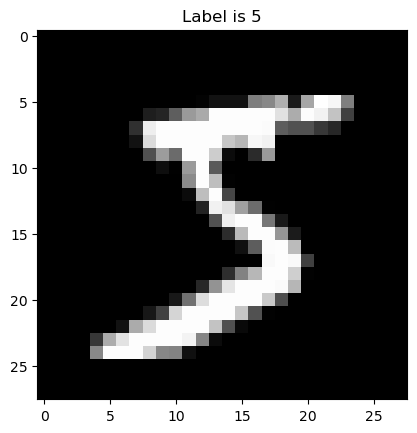

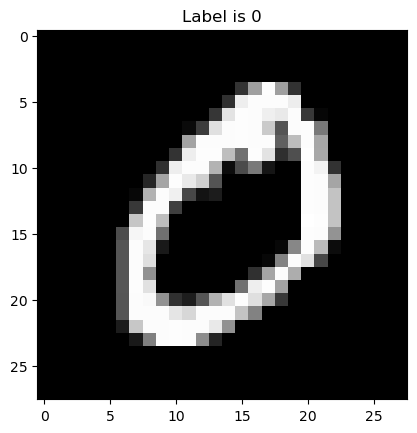

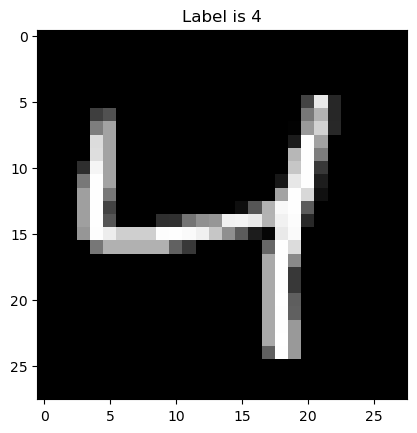

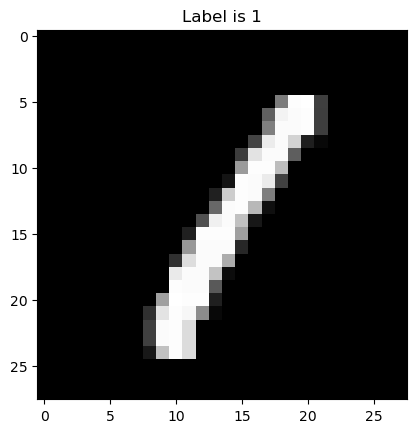

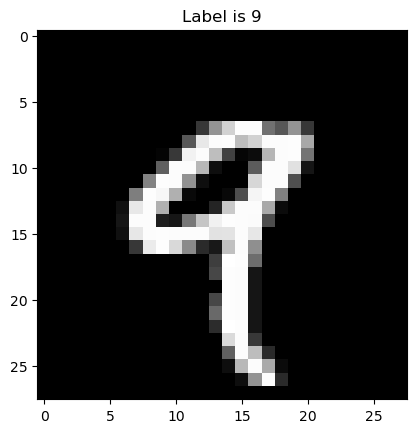

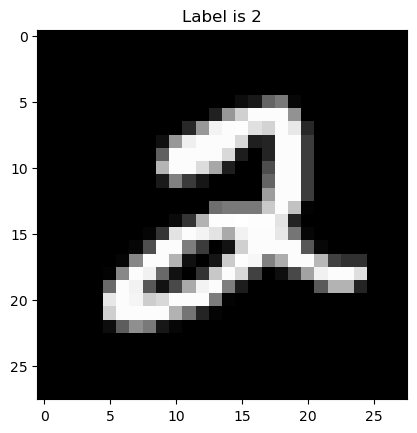

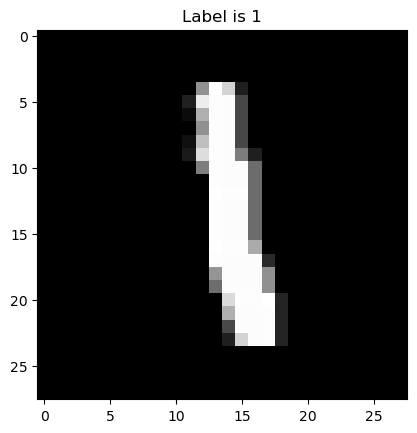

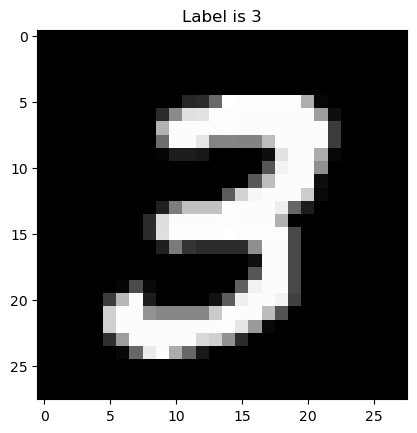

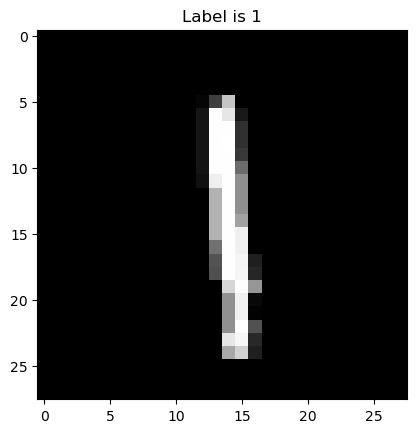

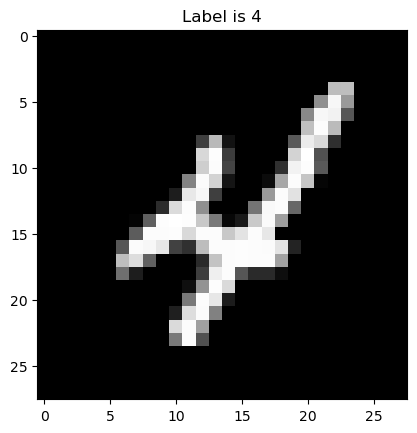

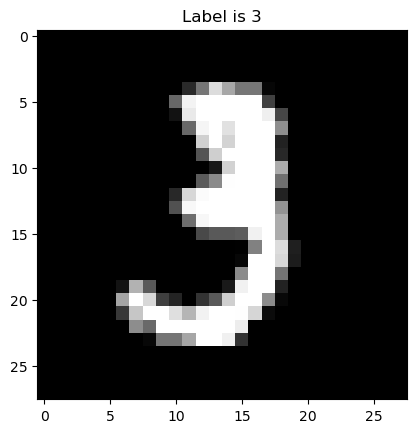

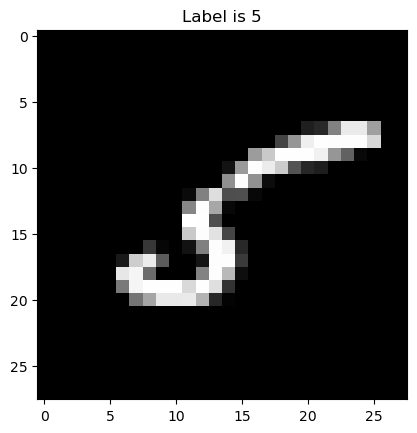

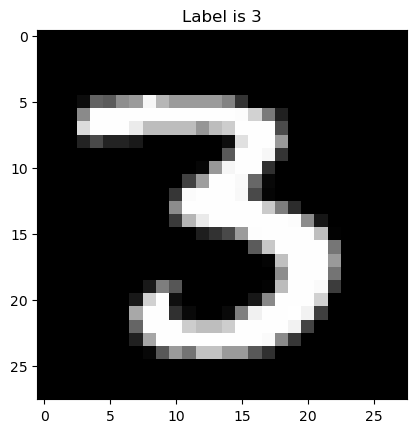

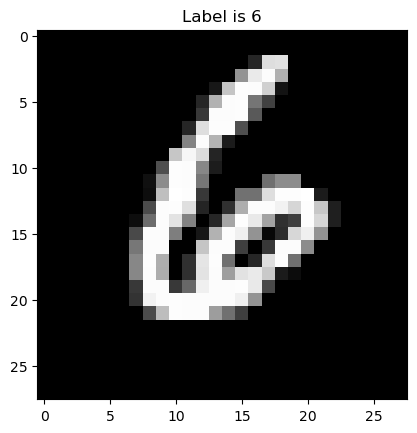

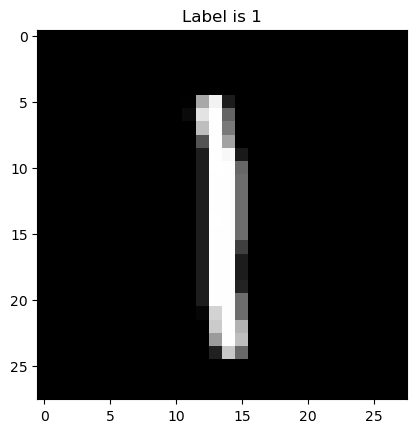

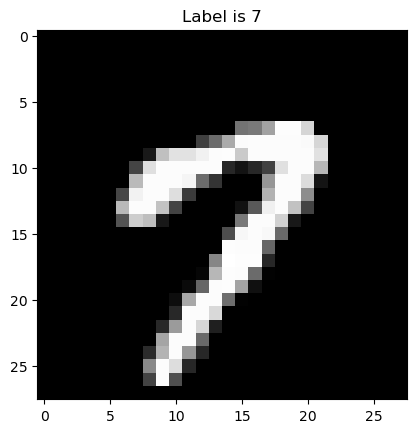

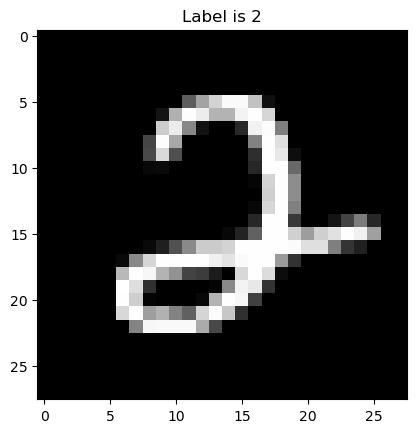

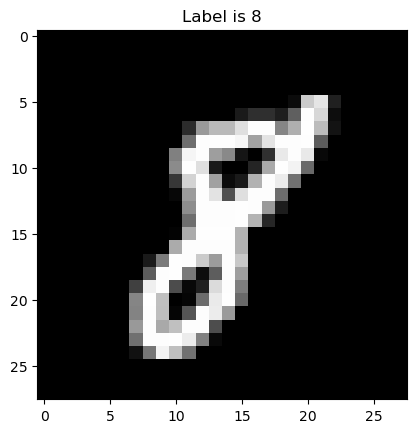

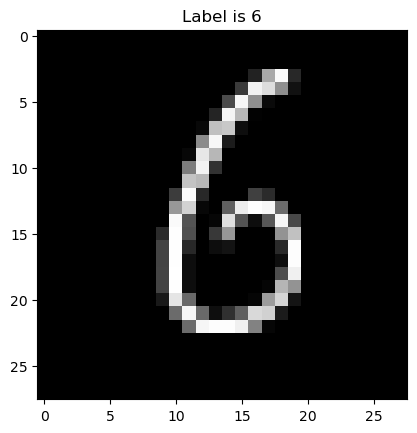

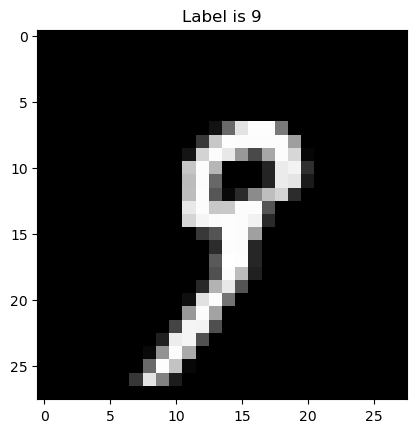

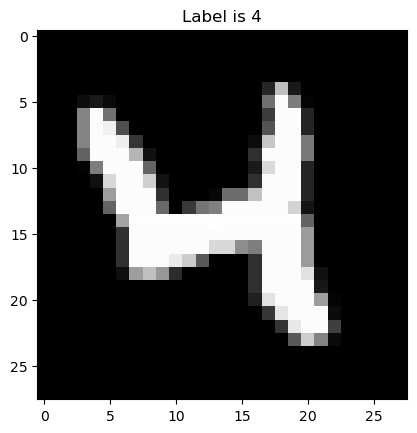

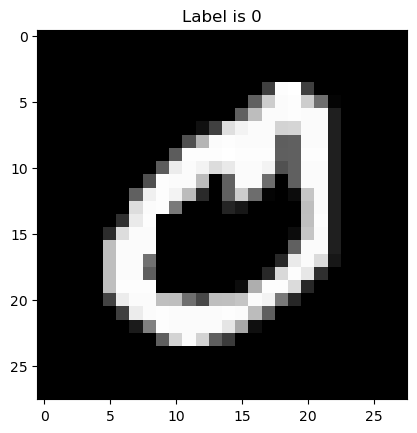

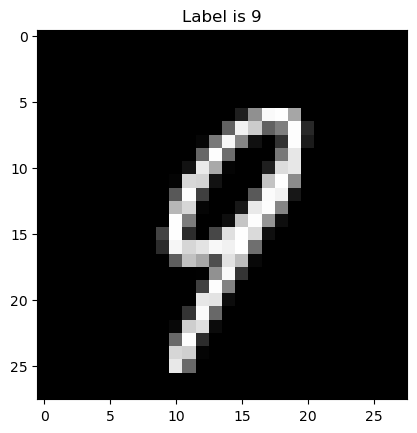

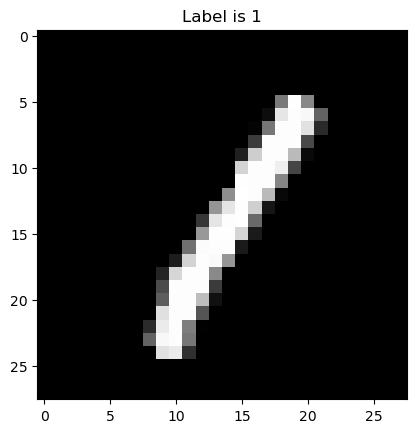

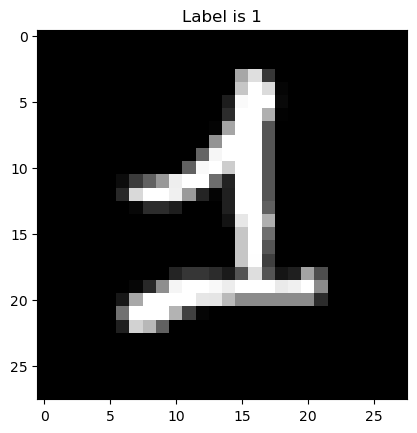

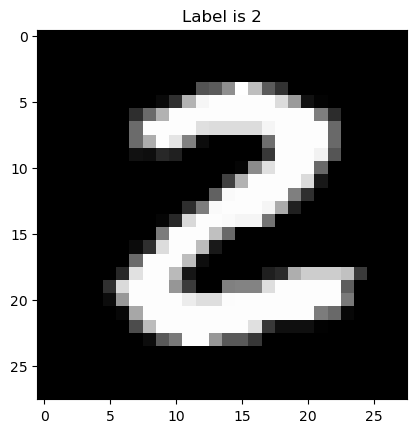

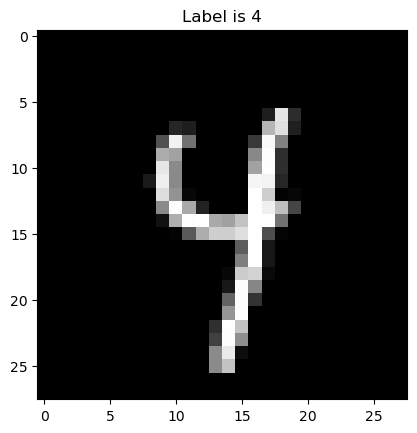

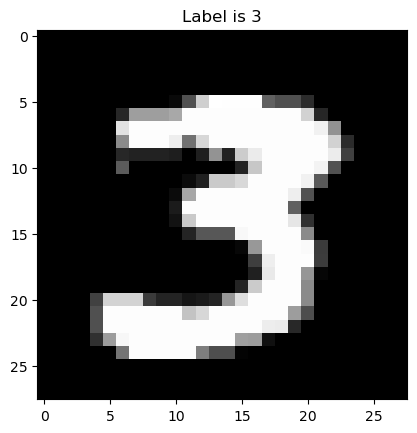

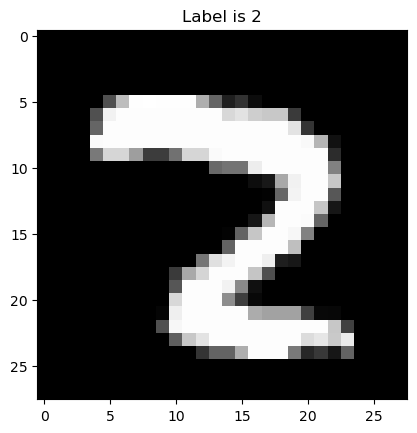

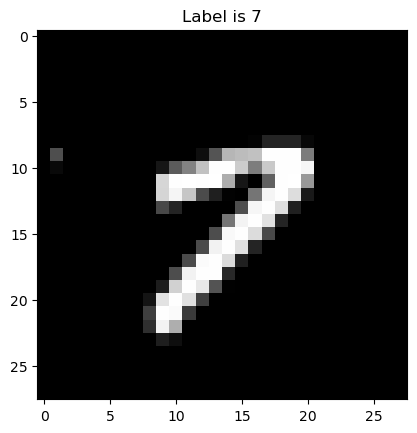

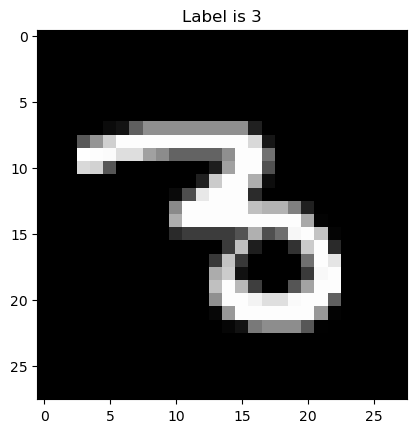

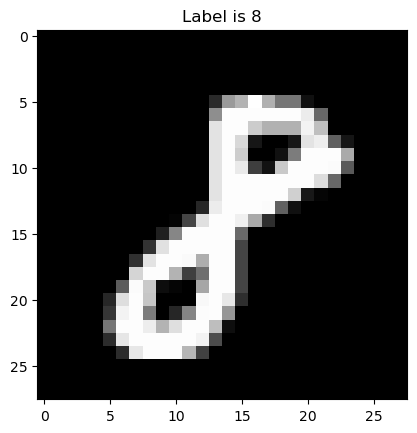

In [14]:
shown_labels = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}
        
for i in range(len(X.values)):
    if all(value >= 2 for value in shown_labels.values()):
        break
    pixels = X.values[i]
    label = y.values[i]
    shown_labels[label] = shown_labels[label]+1
    pixels = np.array(pixels, dtype='uint8')
    pixels = pixels.reshape((28, 28))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [15]:
print(shown_labels)

{'0': 2, '1': 6, '2': 4, '3': 5, '4': 4, '5': 2, '6': 2, '7': 2, '8': 2, '9': 3}


## 3 Train a k-NN Classifier and Check the Performance

### 3.1 Import the required modules for classifier and performance measurement

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

### 3.2 Train the classifier using 3-fold cross_validation 
* create a training and testing set
* train the classifer with cross_validate, check the documentation: What does cross_validate return?

We split features and labels into training and test sets setting the random state to 0 and holding it with all other classifiers to have controls over the randomness of the bootstrapping of the samples. We set test size to 20%

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Then we create some utility variables for the coming algorithms

In [19]:
neighbours_amount = range(2, 20)
best_classifier_acc = None
best_classifier_prec = None
best_acc = 0
best_prec = 0
neighbors_acc = 0
neighbors_prec = 0
accuracies = []
precisions = []

In this cell we try to find the best model for KNeighborsClassifier. For this purpose we try out multiple neighbors and keep the one with the best accuracy and precision. First, initialize `KNeighborsClassifier` starting with 2 neighbours. Then train the model with 3 fold cross validation `cv=3` setting in `scoring` that we want to set the strategy to evaluate the performance of the cross-validated model on the test set by `accuracy` and `precision macro`. After training we estimate the mean values for `accuracy` and `predicion macro` for these folds and print them out. Then we check if there was a better accuracy or precision, if so continue, otherwise set this current model as the best. We also set n_jobs to -1 to use all processors and accelerate the training

And we don't need to do feature scaling for the feature values, because they are already in one scale from 0 to 255

We run `cross validation` here and further to check model performace and and generalizability. Basic idea is to split the dataset into multiple subsets, train the model on some of these subsets, and evaluate its performance on the remaining subset. This process is repeated several times, and the performance metrics are averaged to obtain a more robust estimation of the model's performance.

In [20]:
for i in neighbours_amount:
    kn_classifier = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    cv_res = cross_validate(kn_classifier, X_train, y_train, cv = 3, scoring=['accuracy', 'precision_macro'], return_train_score=False)
    acc_mean = cv_res['test_accuracy'].mean()
    prec_macro_mean = cv_res['test_precision_macro'].mean()
    print("Accuracy with", i, 'neighbors:', acc_mean)
    print("Precision (macro) with", i, 'neighbors:', prec_macro_mean)
    accuracies.append(acc_mean)
    precisions.append(prec_macro_mean)
    if (acc_mean > best_acc):
        best_acc = acc_mean
        best_classifier_acc = kn_classifier
        neighbors_acc = i
    if (prec_macro_mean > best_prec):
        best_prec = prec_macro_mean
        best_classifier_prec = kn_classifier
        neighbors_prec = i

Accuracy with 2 neighbors: 0.9612142397703621
Precision (macro) with 2 neighbors: 0.9621832938336817
Accuracy with 3 neighbors: 0.968517830017703
Precision (macro) with 3 neighbors: 0.9690760693605404
Accuracy with 4 neighbors: 0.966124970641137
Precision (macro) with 4 neighbors: 0.9667899404688999
Accuracy with 5 neighbors: 0.9668749601184682
Precision (macro) with 5 neighbors: 0.967512463877212
Accuracy with 6 neighbors: 0.9655713851813498
Precision (macro) with 6 neighbors: 0.966424373709608
Accuracy with 7 neighbors: 0.9654821115845705
Precision (macro) with 7 neighbors: 0.9662925189019197
Accuracy with 8 neighbors: 0.9649285423878288
Precision (macro) with 8 neighbors: 0.9658724740411436
Accuracy with 9 neighbors: 0.964214256035321
Precision (macro) with 9 neighbors: 0.9651882626424143
Accuracy with 10 neighbors: 0.963089264644451
Precision (macro) with 10 neighbors: 0.9641575909240799
Accuracy with 11 neighbors: 0.962374964898847
Precision (macro) with 11 neighbors: 0.9634305400

In [21]:
print('Best accuracy with', neighbors_acc ,'amount of neighbors')
print('Best precision with', neighbors_prec ,'amount of neighbors')

Best accuracy with 3 amount of neighbors
Best precision with 3 amount of neighbors


As you can see here, the values of accuracy and precision have a tendency to decrease, so we do not need to go on with checking other amounts of neighbors

<Axes: >

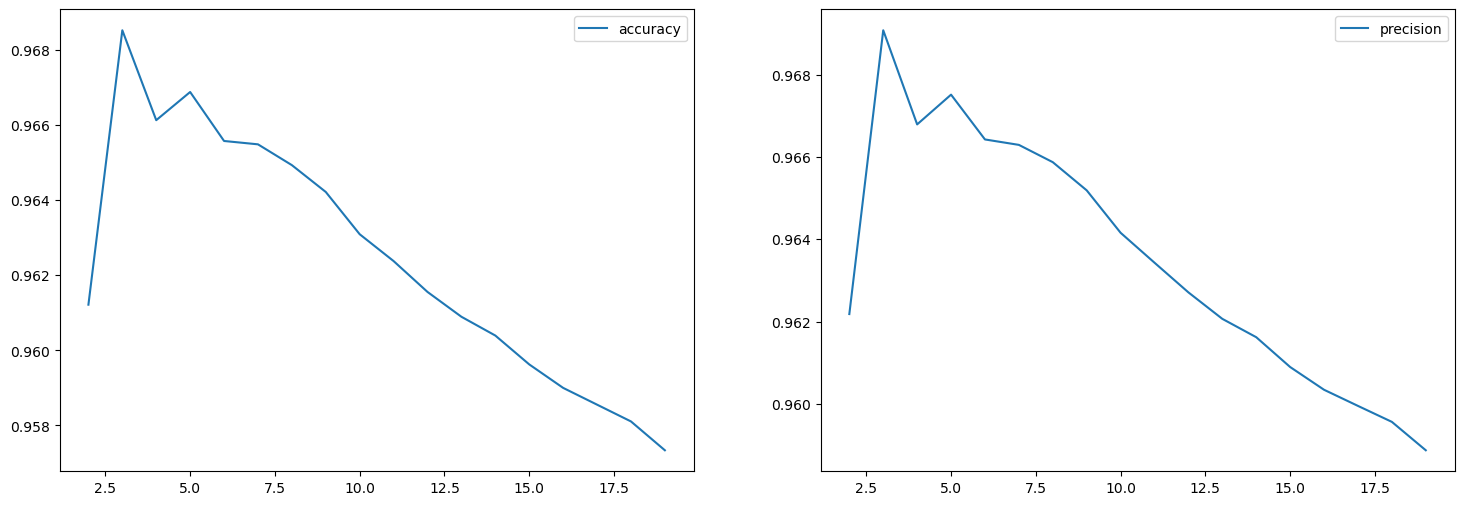

In [22]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
knn_acc_visual = pd.DataFrame(accuracies, index=neighbours_amount, columns=['accuracy'])
sns.lineplot(data=knn_acc_visual)
plt.subplot(1, 2, 2)
knn_prec_visual = pd.DataFrame(precisions, index=neighbours_amount, columns=['precision'])
sns.lineplot(data=knn_prec_visual)

`cross_validate` function returns a dictionary containing various information, and the keys like `test_accuracy`, `test_precision_macro`, and `test_recall_macro`. These keys contain the test scores for accuracy, precision (macro), and recall (macro) respectively. The values associated with each key are arrays containing the scores for each fold in the cross-validation.

As you can see, we have our winner. It is the model with 3 neighbors, which performed the best in both precision and accuracy among the classifiers in range of 2 until 20 neighbors. Now we can take this classifier and train it. So we can just take either `best_classifier_prec` or `best_classifier_acc`, which are the same classifiers, because both have the same amout of neighbors

Here is a representation of training, predictions and test values for comparison

In [23]:
best_classifier_acc.fit(X_train, y_train)
y_pred_knc = best_classifier_acc.predict(X_test)
print(np.concatenate((y_test.values.reshape(len(y_test),1), y_pred_knc.reshape(len(y_pred_knc),1)),1))

[['0' '0']
 ['4' '4']
 ['1' '1']
 ...
 ['7' '7']
 ['4' '4']
 ['6' '6']]


### 3.3 Use the best classifier from the previuous run and check with your test set 
* Generate a classification report
* Generate a confusion matrix

We have our best classifier from the previous run, which is the one with 3 neighbors. Now we use it to show the confusion matrix, classification report and accuracy for the model by simply importing functions from `sklearn.metrics`. The accuracy for this model is very good

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test.values, y_pred_knc))
print()
print(classification_report(y_test.values, y_pred_knc))
print('Accuracy score: ', accuracy_score(y_test, y_pred_knc))

[[1374    1    1    1    1    1    8    0    0    0]
 [   0 1577    1    1    0    0    0    1    0    0]
 [  11    9 1397    3    1    0    1   17    3    1]
 [   0    2   18 1386    1   11    0    6    9    2]
 [   2    6    1    0 1307    0    1    4    1   28]
 [   4    2    1   13    1 1183   17    1    3    6]
 [   8    3    0    0    4    5 1366    0    1    0]
 [   0   18    7    0    2    0    0 1416    1   14]
 [   2   19    5   17    5   19    4    1 1282   14]
 [   3    1    1   11   11    1    1   13    2 1317]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1387
           1       0.96      1.00      0.98      1580
           2       0.98      0.97      0.97      1443
           3       0.97      0.97      0.97      1435
           4       0.98      0.97      0.97      1350
           5       0.97      0.96      0.97      1231
           6       0.98      0.98      0.98      1387
           7       0.97      0.97  

# 4 Train a Decision Tree Classifier and Check the Performance

Import needed library for Decision Tree Classification

In [25]:
from sklearn.tree import DecisionTreeClassifier

### 4.1 Train the classifier using 3-fold cross_validation

Here we initialize our decision tree classifier with random state to 0 as we did during dataset splitting. Then we check our classifier with cross validation setting the same criteria as for KNN.

In [26]:
dt_classifier = DecisionTreeClassifier(random_state = 0)
cv_dt = cross_validate(dt_classifier, X_train, y_train, cv = 3, scoring=['accuracy', 'precision_macro'])
dt_acc_mean = cv_dt['test_accuracy'].mean()
dt_prec_macro_mean = cv_dt['test_precision_macro'].mean()
print("Accuracy mean:", dt_acc_mean)
print("Precision (macro) mean:", dt_prec_macro_mean)

Accuracy mean: 0.8597321641328622
Precision (macro) mean: 0.8579856231048114


We try a bit different approach and to find the best hyperparameters for Decision Tree Classification we use `Grid Search`. We created `param_grid` as the set of parameters to find the best combination from. We initialize DecisionTreeClassifier first and then perform grid search. Then we get the best hyperparameters and best model from that search

In [27]:
from sklearn.model_selection import GridSearchCV
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4, 7, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=3, scoring='accuracy', n_jobs = -1)
grid_search.fit(X, y)

dt_best_params = grid_search.best_params_
dt_best_score = grid_search.best_score_
dt_best_model = grid_search.best_estimator_

In [28]:
dt_best_params

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 7,
 'min_samples_split': 2}

In [29]:
dt_best_score

0.8672429019859891

### 4.2 Check the performance with your test set

Here are our test and predicted values for the comparison using the best estimated model

In [30]:
dt_y_pred = dt_best_model.predict(X_test)
print(np.concatenate((y_test.values.reshape(len(y_test), 1), dt_y_pred.reshape(len(dt_y_pred), 1)), 1))

[['0' '0']
 ['4' '4']
 ['1' '1']
 ...
 ['7' '7']
 ['4' '4']
 ['6' '6']]


Now we use predicted and test results to show the confusion matrix, classification report and accuracy for the model as we did for KNN. The accuracy is worse than in KNN

In [31]:
print(confusion_matrix(y_test.values, dt_y_pred))
print()
print(classification_report(y_test.values, dt_y_pred))
print('Accuracy score: ', accuracy_score(y_test, dt_y_pred))

[[1345    0    5    5    0    9   11    2    6    4]
 [   0 1537    7    8    4    6    6    5    7    0]
 [   4    6 1355   10   14   13    9    6   17    9]
 [   5    8   25 1314    5   29    5    9   23   12]
 [   2    0   13    5 1271    4   13   11    6   25]
 [  15    8   11   34    6 1103   20    5   15   14]
 [  14    7   10    3   17   15 1301    0   14    6]
 [   5    5   24    7   20    5    2 1361   11   18]
 [   6   11   20   28   19   25    8    3 1227   21]
 [   5    1   14   12   32   14    4   16   13 1250]]

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1387
           1       0.97      0.97      0.97      1580
           2       0.91      0.94      0.93      1443
           3       0.92      0.92      0.92      1435
           4       0.92      0.94      0.93      1350
           5       0.90      0.90      0.90      1231
           6       0.94      0.94      0.94      1387
           7       0.96      0.93  

## 5 Improve with random forests

Let's improve this with `Random Forest Classifiers`, which are basically a team of Decision Trees working together. In order to do this we do almost the same as in Decision tree, except we also should set the number of estimators - number of trees in a forest(number of decision trees in team), which we set to 10, because bigger numbers are time efficient

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state = 0, n_jobs = -1)
rf_cv = cross_validate(rf_classifier, X_train, y_train, cv = 3, scoring=['accuracy', 'precision_macro'])
rf_acc_mean = rf_cv['test_accuracy'].mean()
rf_prec_macro_mean = rf_cv['test_precision_macro'].mean()
print("Accuracy mean:", rf_acc_mean)
print("Precision (macro) mean:", rf_prec_macro_mean)

Accuracy mean: 0.9655178395822871
Precision (macro) mean: 0.9653016220290208


Now here also we try to find the most optimal hyperparameters using GridSearchCV

In [33]:
rf_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=3, scoring='accuracy', n_jobs = -1)
grid_search.fit(X, y)

rf_best_params = grid_search.best_params_
rf_best_score = grid_search.best_score_
rf_best_model = grid_search.best_estimator_

In [39]:
rf_best_params

{'max_depth': 10, 'n_estimators': 100}

In [40]:
rf_best_score

0.9443571273244493

In [34]:
rf_y_pred = rf_best_model.predict(X_test)
print(np.concatenate((y_test.values.reshape(len(y_test), 1), rf_y_pred.reshape(len(rf_y_pred), 1)), 1))

[['0' '0']
 ['4' '4']
 ['1' '1']
 ...
 ['7' '7']
 ['4' '4']
 ['6' '6']]


Now we use predicted and test results to show the confusion matrix, classification report and accuracy for the model as we did for KNN and DTC. The accuracy is a bit worse than in KNN, but better than DTC

In [35]:
print(confusion_matrix(y_test.values, rf_y_pred))
print()
print(classification_report(y_test.values, rf_y_pred))
print('Accuracy score: ', accuracy_score(y_test, rf_y_pred))

[[1372    0    0    0    2    1    4    0    8    0]
 [   0 1561    5    3    3    0    3    3    2    0]
 [   1    4 1396    6    6    1    8   10    7    4]
 [   1    5   21 1351    0   16    2   15   14   10]
 [   2    0    0    1 1282    0    6    6    3   50]
 [   1    9    3   12    2 1170   11    3    8   12]
 [   4    5    0    0    4    9 1360    0    5    0]
 [   3    9   19    1   14    0    0 1365    5   42]
 [   2   14    2    4    3    4    2    0 1307   30]
 [   4    4    2   19   19    1    1   19   11 1281]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1387
           1       0.97      0.99      0.98      1580
           2       0.96      0.97      0.97      1443
           3       0.97      0.94      0.95      1435
           4       0.96      0.95      0.95      1350
           5       0.97      0.95      0.96      1231
           6       0.97      0.98      0.98      1387
           7       0.96      0.94  

## 6 Further improvement: Gradient Boosting (Random Forests)

Let's try to improve the result even more. We use `Gradient Boosting` for that purpose. As we did with other classifiers, we check our model's performance using cross validation and then in this case just train and predict values. Because Gradient Boosting is very time consuming, we do not perform Grid Search here

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gb_classifier = GradientBoostingClassifier(random_state = 0)
gb_cv = cross_validate(gb_classifier, X_train, y_train, cv = 3, scoring=['accuracy', 'precision_macro'])
gb_acc_mean = gb_cv['test_accuracy'].mean()
gb_prec_macro_mean = gb_cv['test_precision_macro'].mean()
print("Accuracy mean:", gb_acc_mean)
print("Precision (macro) mean:", gb_prec_macro_mean)

Accuracy mean: 0.9436785640583368
Precision (macro) mean: 0.943246257020685


Now we train our classifier and see the predictions

In [37]:
gb_classifier.fit(X_train, y_train)
gb_y_pred = gb_classifier.predict(X_test)
print(np.concatenate((y_test.values.reshape(len(y_test), 1), gb_y_pred.reshape(len(gb_y_pred), 1)), 1))

[['0' '0']
 ['4' '4']
 ['1' '1']
 ...
 ['7' '7']
 ['4' '4']
 ['6' '6']]


Now we use predicted and test results to show the confusion matrix, classification report and accuracy for the model as we did for KNN and DTC and RFC. The accuracy is worse than in KNN and RFC, but a bit better than DTC

In [38]:
print(confusion_matrix(y_test.values, gb_y_pred))
print()
print(classification_report(y_test.values, gb_y_pred))
print('Accuracy score: ', accuracy_score(y_test, gb_y_pred))

[[1359    0    1    1    6    5    7    1    7    0]
 [   0 1547   10    6    2    4    4    3    3    1]
 [   5    8 1341   20   15    3    5   13   31    2]
 [   3    5   34 1304    2   25    2   18   29   13]
 [   2    3    6    1 1276    2    7    4    8   41]
 [   4    8    6   23    5 1135   20    3   15   12]
 [  13    2    6    0   15   15 1325    2    9    0]
 [   3   10   21    7   12    4    0 1359    9   33]
 [   3   14   11   13    8   11    6    2 1272   28]
 [   4    4    5   19   32   10    1   33    7 1246]]

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1387
           1       0.97      0.98      0.97      1580
           2       0.93      0.93      0.93      1443
           3       0.94      0.91      0.92      1435
           4       0.93      0.95      0.94      1350
           5       0.93      0.92      0.93      1231
           6       0.96      0.96      0.96      1387
           7       0.95      0.93  

So even with the seach of optimal hyperparamters we couldn't make a better classifier than random forest. Random Forest is likely to be a more suitable choice between RandomForestClassifier and GradientBoosting. Random Forest can handle high-dimensional data well, and each decision tree in the ensemble can learn different aspects of the data. It is less prone to overfitting and requires less hyperparameter tuning compared to Gradient Boosting. Random Forest is computationally efficient, which can be beneficial when dealing with a dataset like MNIST. Gradient Boosting, especially with decision trees as weak learners, has the potential to capture complex patterns in the data. However, it often requires more hyperparameter tuning and computational resources. The strengths of Gradient Boosting, such as capturing intricate relationships, might not be fully utilized in the case of MNIST where the patterns are relatively straightforward.

### Conclusion

In conclusion, we can say that our first classifier KNN Classifier has shown the best performance among all of the tested classifiers. However, we can also point out that as we proceeded the tasks 4 until 6, we have gotten better and better results, which shows, that there is not any rule how to beforehand know which classifier to use until we try them all out, because classifiers perform differently depending on data we provide and use case we are working on. GridSearch also gives us more space to experiment